In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam 
import math
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
class ODEsolver(Sequential): 
    def __init__(self, **kwargs): 
        super().__init__(**kwargs) 
        self.loss_tracker = keras.metrics.Mean(name="loss") 
    
    @property 
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data): 
        
        batch_size = tf.shape(data)[0]
        
        
        x = tf.random.uniform((batch_size, 1), minval = -5, maxval = 5)
        
        
        
        with tf.GradientTape() as tape:
          with tf.GradientTape() as tape2:
            tape2.watch(x)   
       
            with tf.GradientTape(persistent=True) as tape3: 
              tape3.watch(x)
              x_o = tf.zeros((batch_size, 1))
              tape3.watch(x_o)
              y_pred = self(x, training = True)
              y_o = self(x_o, training = True)

            dy = tape3.gradient(y_pred, x)
            dy_o = tape3.gradient(y_o, x_o)
            #vectores de ceros
          dy_2=tape2.gradient(dy,x)
          

            #ecuacion diferencial  
          eq = dy_2 + y_pred 
            
            #condiciones iniciales
          ic = y_o -1. 
          ic_2 = dy_o 
            
          #funcion de costo   
          loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) + keras.losses.mean_squared_error(-0.5,ic_2)
    
        grads =tape.gradient(loss, self.trainable_variables)
    
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    
    #guarda un historial 
        self.loss_tracker.update_state(loss)
    
    #imprime el historial 
        return  {"loss": self.loss_tracker.result()}

In [3]:
model = ODEsolver()

model.add(Dense(20, activation = "tanh", input_shape = (1, ) ))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(10, activation = "tanh"))

model.add(Dense(1, activation ="linear"))


model.summary()
model.compile(optimizer = RMSprop(), metrics = ['loss'])

Model: "od_esolver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                40        
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


2022-10-20 21:50:46.154258: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
x = tf.linspace(-5, 5, 100) 
history = model.fit(x, epochs = 1000, verbose =1) 

#dominio 
x_testv = tf.linspace(-5, 5, 100)

a = model.predict(x_testv)

Epoch 1/1000
4/4 [==============================] - 2s 5ms/step - loss: 1.9421
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.1895
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.8829
Epoch 4/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.7224
Epoch 5/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.6214
Epoch 6/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.5551
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4892
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4616
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4285
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4052
Epoch 11/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.3907
Epoch 12/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3557
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 6ms/step - loss: 0.0979
Epoch 104/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0968
Epoch 105/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1048
Epoch 106/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1255
Epoch 107/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1092
Epoch 108/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1056
Epoch 109/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.1172
Epoch 110/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.1040
Epoch 111/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1116
Epoch 112/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1239
Epoch 113/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1048
Epoch 114/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1261
Epoch 115/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0985
Epoch 205/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0875
Epoch 206/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0960
Epoch 207/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1030
Epoch 208/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1057
Epoch 209/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0804
Epoch 210/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0994
Epoch 211/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0921
Epoch 212/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0983
Epoch 213/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0854
Epoch 214/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1132
Epoch 215/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1005
Epoch 216/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0627
Epoch 306/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 307/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0623
Epoch 308/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0578
Epoch 309/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0763
Epoch 310/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0854
Epoch 311/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0697
Epoch 312/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0634
Epoch 313/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0763
Epoch 314/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0600
Epoch 315/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0822
Epoch 316/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0660
Epoch 317/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 407/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0551
Epoch 408/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0626
Epoch 409/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0516
Epoch 410/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0534
Epoch 411/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0624
Epoch 412/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0628
Epoch 413/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 414/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0558
Epoch 415/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0572
Epoch 416/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0564
Epoch 417/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0507
Epoch 418/1000
4/4 [======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0433
Epoch 508/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0368
Epoch 509/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0305
Epoch 510/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0398
Epoch 511/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0495
Epoch 512/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0418
Epoch 513/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0451
Epoch 514/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 515/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0390
Epoch 516/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0370
Epoch 517/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0397
Epoch 518/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0355
Epoch 519/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0304
Epoch 609/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0270
Epoch 610/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0376
Epoch 611/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0251
Epoch 612/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0350
Epoch 613/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0240
Epoch 614/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0308
Epoch 615/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0300
Epoch 616/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0292
Epoch 617/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0271
Epoch 618/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0247
Epoch 619/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0296
Epoch 620/1000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 710/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 711/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0256
Epoch 712/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0164
Epoch 713/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 714/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0148
Epoch 715/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0306
Epoch 716/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0156
Epoch 717/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0172
Epoch 718/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0259
Epoch 719/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 720/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0210
Epoch 721/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0178
Epoch 811/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 812/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 813/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 814/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 815/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 816/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0110
Epoch 817/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 818/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0166
Epoch 819/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0154
Epoch 820/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 821/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0166
Epoch 822/1000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0222
Epoch 912/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 913/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 914/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 915/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 916/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 917/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0227
Epoch 918/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 919/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 920/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 921/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 922/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 923/1000
4/4 [=======================

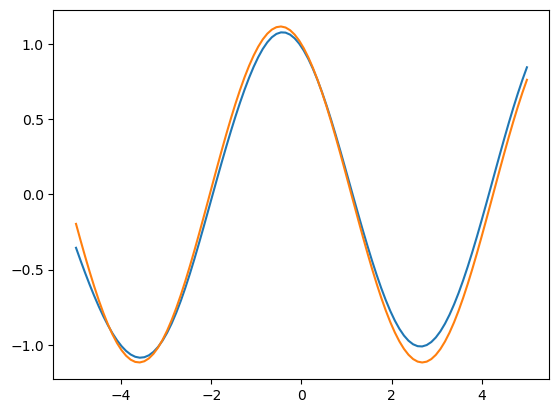

In [6]:
plt.plot(x_testv, a)
#comparamos la solucion numerica dada por la RNA con la solucion analitica
plt.plot(x_testv, tf.cos(x) - 0.5*tf.sin(x)) 
plt.show()